In [17]:
import pandas as pd

def set_pandas_display_options(count):
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = count
    display.max_rows = count
    display.max_colwidth = count
    display.width = count

# Increase this value to display more info from pandas
set_pandas_display_options(500)

In [18]:
df = pd.read_csv('data.csv')

In [19]:
# Add article category from file name
# The category is between the first "\" to the first "-"
# For example: Articles\music-news_world_Article-b1685ab6f1d8471026_1641315437.html -> \music- -> music is the category
categories = [name[name.find('\\') + 1:name.find('-')] for name in df.file_name]
df['categories'] = pd.Series(categories, dtype='category')

In [20]:
# Drop textarea_count - they're always zero
df.drop(columns=['textarea_count'], inplace=True)

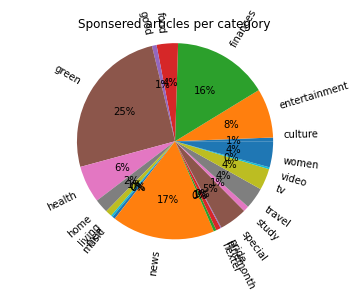

In [21]:
from collections import Counter
data = Counter(df[df.is_sponsered == True].categories)

import matplotlib.pyplot as plt
plt.pie(data.values() ,labels=data.keys(), autopct='%1.0f%%', rotatelabels=True)
plt.title('Sponsered articles per category')
plt.axis('equal')
plt.show()

In [22]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,is_sponsered,bold_count,is_advertisement,links_count,input_count,media_count,title_length,text_length,mutual_title_text_keywords_count,title_anticipation,title_joy,title_trust,title_fear,title_surprise,title_anger,title_sadness,title_disgust,text_anticipation,text_joy,text_trust,text_fear,text_surprise,text_anger,text_sadness,text_disgust
is_sponsered,1.000000,0.030778,0.118966,0.024641,0.030588,0.040039,-0.073073,-0.044021,-0.063163,0.081684,0.093137,0.050564,-0.025444,0.017044,-0.063342,-0.042668,-0.107928,-0.060017,0.115454,0.185821,-0.040982,-0.009569,-0.058957,-0.066009,-0.133599
bold_count,0.030778,1.000000,0.011110,0.767536,0.074767,0.786487,-0.178947,0.263958,-0.031521,0.139011,0.093852,0.082044,-0.076822,0.042474,-0.092195,-0.020995,-0.152531,0.085592,0.098267,0.004709,-0.084527,0.024198,-0.033118,-0.061853,-0.070167
is_advertisement,0.118966,0.011110,1.000000,0.011978,0.000981,0.010660,-0.013938,0.008947,0.001671,0.021726,0.025904,0.031485,-0.005373,-0.003662,-0.013079,-0.010275,-0.020743,-0.001193,0.012662,0.019711,-0.007988,-0.004107,-0.011149,-0.016458,-0.030465
links_count,0.024641,0.767536,0.011978,1.000000,0.270752,0.900548,-0.196230,0.012803,-0.034358,0.108846,0.074530,0.071658,-0.091127,0.049287,-0.060518,0.004396,-0.122284,0.057870,0.077020,-0.020270,-0.103044,0.029833,-0.028313,-0.046949,-0.049409
input_count,0.030588,0.074767,0.000981,0.270752,1.000000,0.147328,0.109581,-0.082805,-0.068554,-0.058974,-0.005795,0.000621,0.089888,0.003898,0.031628,0.062008,0.035009,-0.086004,-0.016848,0.068330,0.123194,-0.017689,0.020348,0.121203,-0.036190
media_count,0.040039,0.786487,0.010660,0.900548,0.147328,1.000000,-0.226550,0.181990,-0.020152,0.131643,0.111607,0.078306,-0.089956,0.040867,-0.079550,-0.010654,-0.153496,0.100603,0.130529,-0.007743,-0.095499,0.033671,-0.014797,-0.038744,-0.064082
title_length,-0.073073,-0.178947,-0.013938,-0.196230,0.109581,-0.226550,1.000000,0.058093,0.178837,-0.106596,-0.103097,-0.048465,0.135396,-0.085836,0.198446,0.233982,0.230578,-0.011263,-0.161632,-0.156502,0.117381,-0.015548,0.140153,0.206294,0.224638
text_length,-0.044021,0.263958,0.008947,0.012803,-0.082805,0.181990,0.058093,1.000000,-0.006584,0.034465,0.022190,0.004121,0.027247,0.021188,-0.004900,0.006817,0.002895,0.114994,0.020101,-0.069600,0.028289,0.016556,0.057996,0.032465,0.087007
mutual_title_text_keywords_count,-0.063163,-0.031521,0.001671,-0.034358,-0.068554,-0.020152,0.178837,-0.006584,1.000000,0.014384,-0.042308,-0.031683,-0.001941,-0.028056,-0.041347,-0.031015,-0.000330,0.136532,-0.018196,-0.115674,-0.006044,-0.026275,0.022250,0.010216,0.077682
title_anticipation,0.081684,0.139011,0.021726,0.108846,-0.058974,0.131643,-0.106596,0.034465,0.014384,1.000000,0.262942,0.240127,-0.125247,0.049446,-0.477054,-0.204735,-0.506019,0.207052,0.191735,0.143695,-0.140406,0.008367,-0.210478,-0.211217,-0.257466


In [23]:
# One-hot-encode the categories using LabelBinarizer
# Copied from https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit(df['categories'])
transformed = encoder.transform(df['categories'])
ohe_df = pd.DataFrame(transformed, columns=df.categories.unique())
# Also drop the categories column because it is non-numeric
categories = df.categories
df = pd.concat([df, ohe_df], axis=1).drop(['categories'], axis=1)

In [24]:
# Drop the file_name column because it is non-numeric
file_names = df.file_name
df.drop(columns=['file_name'], inplace=True)

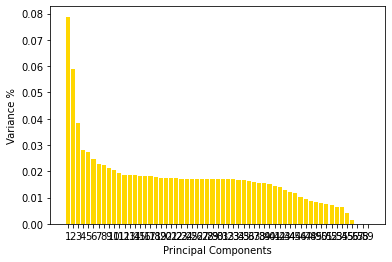

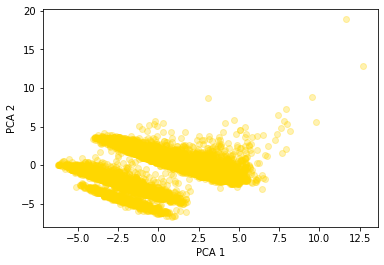

In [9]:
# Dimensionality Reduction with PCA - copied from https://andrewmourcos.github.io/blog/2019/06/06/PCA.html
# First normalize the data
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca_data = pca.fit_transform(std_data)
pca_df = pd.DataFrame(pca_data)

# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

plt.scatter(pca_df[0], pca_df[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

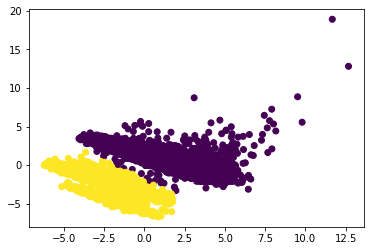

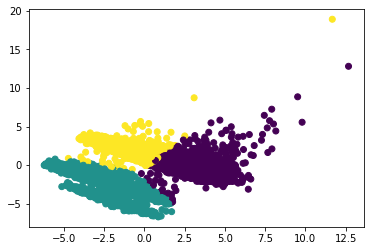

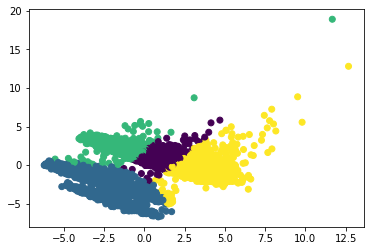

In [41]:
# Chose the correct K for KMeans - copied from https://andrewmourcos.github.io/blog/2019/06/06/PCA.html
from sklearn.cluster import KMeans

for i in range(2, 5):
    km = KMeans(n_clusters=i)
    km = km.fit(pca_df.iloc[:,:2])
    plt.scatter(pca_df[0], pca_df[1], c=km.labels_)
    plt.show()

In [36]:
km = KMeans(n_clusters=2)
km = km.fit(pca_df.iloc[:,:2])
labels = km.labels_

In [37]:
df['label'] = labels
# Get the file names and categories back
df['categories'] = categories
df['file_name'] = file_names

In [42]:
def print_column_count(label, column):
    print(f'{column} count')
    print(label[column].value_counts())
    print()

def print_label_info(label_num):
    print(f'Info for label #{label_num}')
    label = df[df.label == label_num]
    print(f'Items count: {df.file_name.count()}')
    
    print_column_count(label, 'is_sponsered')
    print_column_count(label, 'is_advertisement')
    print_column_count(label, 'categories')
    
    print('Sponsered Categories count:')
    print_column_count(label[label.is_sponsered == True], 'categories')
    
    print('File names sample:')
    print(label.sample(n=10).file_name)
    
    print('Mean:')
    print(label.mean())
    return label

In [43]:
label_0 = print_label_info(0)

Info for label #0
Items count: 25836
is_sponsered count
False    5612
True      110
Name: is_sponsered, dtype: int64

is_advertisement count
False    5722
Name: is_advertisement, dtype: int64

categories count
news               4566
tvbee              1156
spirituality          0
ninemonth             0
opinions              0
pride                 0
pzm                   0
special               0
special_Article       0
study                 0
Sports                0
travel                0
tv                    0
tv_Article            0
video                 0
women                 0
nexter                0
24tv                  0
music                 0
men                   0
maariv                0
living                0
home                  0
hix_Article           0
hix                   0
health                0
green                 0
good                  0
food                  0
finances              0
entertainment         0
culture               0
cannabis              

C:\Users\ofeks\AppData\Local\Temp/ipykernel_12240/4188229555.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(label.mean())


In [44]:
label_1 = print_label_info(1)

Info for label #1
Items count: 25836
is_sponsered count
False    19571
True       543
Name: is_sponsered, dtype: int64

is_advertisement count
False    20099
True        15
Name: is_advertisement, dtype: int64

categories count
entertainment      2857
men                2007
travel             1971
music              1865
tv                 1777
finances           1557
hix                1207
women              1204
culture            1089
food                902
health              826
nexter              540
pride               394
cannabis            342
home                287
green               270
living              244
good                224
Sports              172
pzm                 132
ninemonth            75
spirituality         53
special              34
news                 31
video                19
study                14
opinions              7
24tv                  4
tv_Article            3
tvbee                 3
special_Article       1
maariv                1
hix_

C:\Users\ofeks\AppData\Local\Temp/ipykernel_12240/4188229555.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(label.mean())
